Copyright 2020 Verily Life Sciences LLC

Use of this source code is governed by a BSD-style
license that can be found in the LICENSE file or at
https://developers.google.com/open-source/licenses/bsd

## Site Activation Notebook

The goal of this notebook is to provide the trial planner with an overview of the trial simulation. 
The trial planner can use this vis to answer questions such as:
* What is the demographic breakdown of participants for the entire trial? How are these distributed across sites?
* What is the probability distribution of success days for the entire trial?
* What is the expected number of control arm events for the overall trial?
* How are these control arm events broken down for each site -- ie, what are the expected number of control arm events for each site?

Moreover, the trial planner can *interactively* change recruitment at *individual* sites and visualize the impact on trial outcomes. The user can propose new recruitment rates at individual sites. The notebook then computes the new, proposed trial outcomes -- including the expected time to success of the trial and the expected demographic distribution of participants. We then display the original trial outcomes as well the proposed outcomes.

If your trial has additional complications that you would like the tool to capture, please contact metis@projectbaseline.com for additional help.

### Imports

In [ ]:
import os
from metis import site_activation_vis
from metis import io as metis_io

## Necessary Inputs

This notebook requires the complete trial specification as input. We use a demo trial specification; creating your own trial specification is covered in the notebook trial_specification_demo.

The next cell loads the required input data for the visualization. The data is loaded into an [xarray.Dataset](http://xarray.pydata.org/en/stable/), a [convenient datastructure](http://xarray.pydata.org/en/stable/why-xarray.html) for storing multidimensional arrays with different labels, coordinates or attributes. The input data contains a complete characterization of the trial, stored as (coordinates, variables) in the xarray. 

In what follows, we use demo data (original_ds) that we are providing with this opensource release. This data was constructed using a mix of open source repositories and random numbers, see the trial_specification_notebook for more details. 

The demodata consists of a single xarray Dataset named original_ds. It includes:
1. The list of trial sites. Each trial site is a single *location*.  This location comes with a set of properties, including (latitude, longitude). For this demo, we are assuming that locations are characterized by US counties.
1. For each location, original_ds specifies a set of scenarios for how the covid epidemic might play out. These scenarios can be different samples from a single model, or a combination of different models.  For the demo data loaded into this notebook, we use the CDC ensemble and baseline models for US county-level prevalence as input.
1. For each location, original_ds also specifies the trial recruitment plan. In the simplest implementation, this is programmed as the number of participants that can be enrolled in each site per week, together with the day that enrollment starts at each site.
1. The trial specification also includes a list of demographic variables for each site. Most basic is that each trial site occurs in a US county (in this demo notebook), which has a population. The population is then further split into categories, in the demo_data we choose comorbidity, ethnicity and age. For the demo dataframe used in this notebook, we choose comorbidity as "none", "obese", "smokers", "diabetes. For ethnicity, we choose "other", "black", "hisp_lat" and for age we consider 'over_60' and 'under_60'. Each demographic variable is a random number that represents a fraction of the population. 
1. Another factor in the trial plan is the clinical endpoint. This represents the fraction of people who contract covid (as measured by positive case counts) who reach the desired clinical endpoint of the trial. 
1. The probability of becoming infected can depend on demographic group. For example, if a demographic group is twice as likely to contract covid, its incidence_scalar is 2.
1. A fraction (proportion_control_arm) of the enrolled participants are placed in the control arm. 
1. The trial plan also includes the observation delay, how long after the first vaccine dose does the observation period begin. 


## Set up file paths

In [ ]:
demo_path = os.path.join(os.path.abspath('.'), 'demo_data')

file_name = 'site_list1_all_site_on.nc'
file_path = os.path.join(demo_path, file_name)

## Run visualization

The next cell runs the visualization. The visualization is built so that it is easy to _compare_ two different trial plans to each other: the initial trial plan ('original') with the 'proposed' trial plan, where the proposed trial plan are the changes that the trial planner experiments with in this notebook.

The top half of the visualization summarizes the state of the overall trial. It shows the success day probability distribution for two different assumed vaccine efficacies (taken to be 55% and 75% for this illustrative example). It also shows the total number of participants in the different demographic groups projected to be enrolled in the trial.

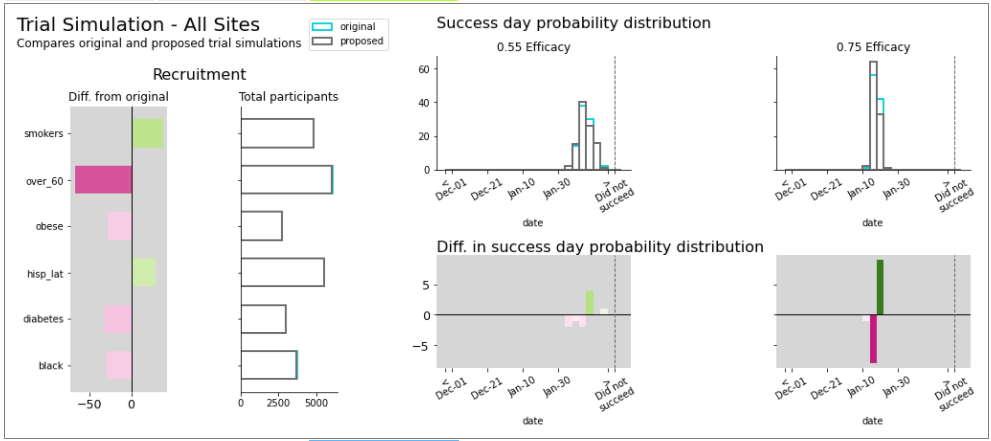

The bottom half of the visualization breaks this down for each site. The sites can be chosen individually in the dropdown menu -- which then illustrates the incidence projections and the projected recruitment broken down by demographic group for the site.

By toggling the buttons (0.0x,0.5x,1.0x,1.5x) the user can either turn off, cut the recruitment by 50%, leave the recruitment the same or boost the recruitment at the selected site by 50%. Given that the overall trial size is fixed, changing the enrollment at individual sites affects the entire trial. This is recalculated on the fly. 

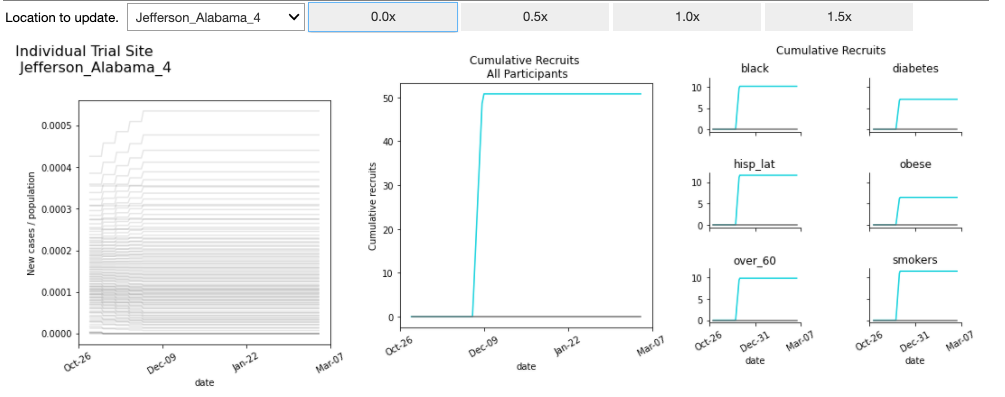

In the table, the user can sort the sites by the demographic variables they specified while constructing the dataset. The table shows the demographic characteristics of that site as well as the projected number of control arm events for that site, under the original and the proposed plans.

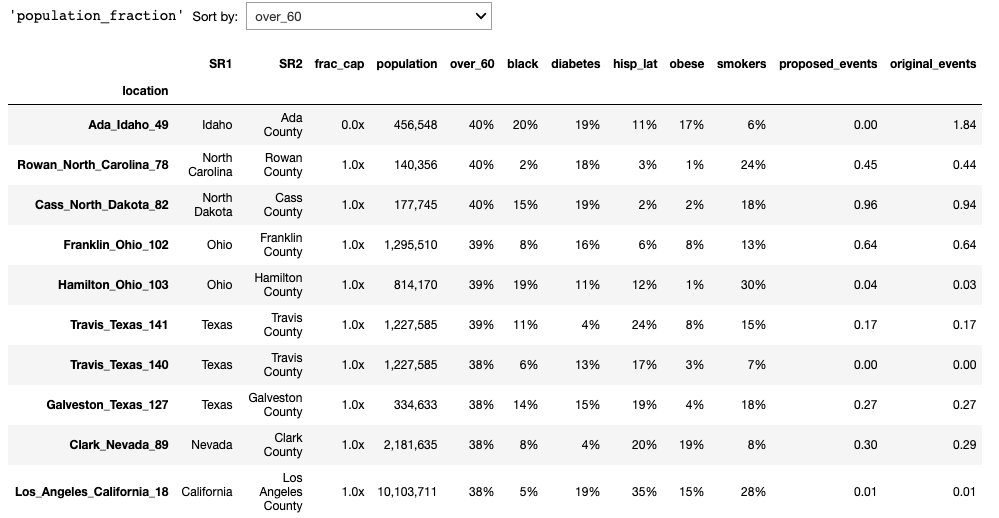

Finally, the user can reset the proposed plan entirely (this will delete all current changes) by clicking the Reset button in the upper left corner. To save the changes beforehand, click the save button. The proposed trial plan will be saved to the file path specified in ville_config.py.

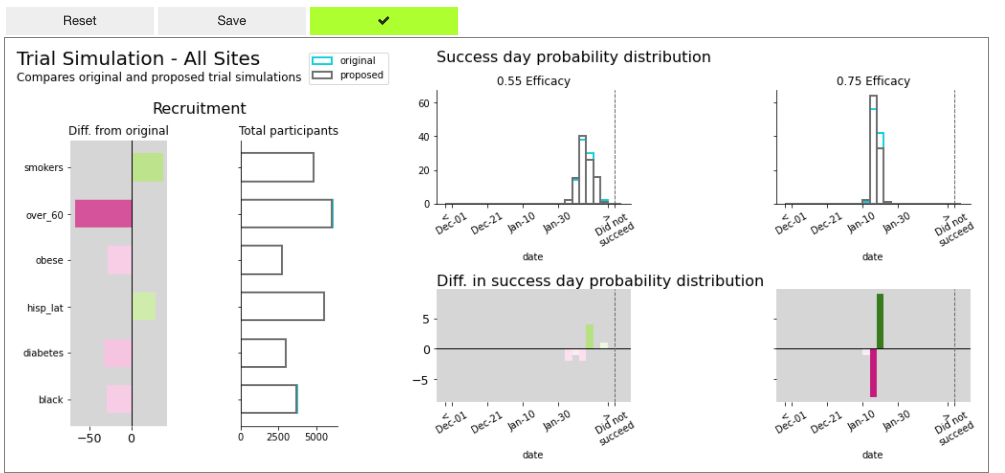

Any trial planner who would like to refine this analysis for their trial can contact metis@projectbaseline.com

In [ ]:
original_ds = metis_io.load_ville_from_netcdf(file_path)
site_activation_vis.site_activation(original_ds)